In [340]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb 
from sklearn.model_selection import GridSearchCV
import graphviz

from sklearn import svm

import pickle

In [341]:
df=pd.read_csv('data/final_data.csv')

In [342]:
df

,SIBS,DEGREE_BACHELOR,DEGREE_GRADUATE,DEGREE_HIGH SCHOOL,DEGREE_JUNIOR COLLEGE,PADEG_BACHELOR,PADEG_GRADUATE,PADEG_HIGH SCHOOL,PADEG_JUNIOR COLLEGE,PADEG_LT HIGH SCHOOL,MADEG_BACHELOR,MADEG_GRADUATE,MADEG_HIGH SCHOOL,MADEG_JUNIOR COLLEGE,MADEG_LT HIGH SCHOOL,SEX_FEMALE,SEX_MALE,MAJOR1_ACCOUNTING/BOOKKEEPING,MAJOR1_ADVERTISING,MAJOR1_AGRICULTURE/HORTICULTURE,MAJOR1_ALLIED HEALTH,MAJOR1_ANTHROPOLGY,MAJOR1_ARCHITECTURE,MAJOR1_ART,MAJOR1_Administrative Science/Public Administration,MAJOR1_Aviation/Aeronatics,MAJOR1_BIOLOGY,MAJOR1_BUSINESS ADMINISTRATION,MAJOR1_CHEMISTRY,MAJOR1_COMM. DISORDERS,MAJOR1_COMMUNICATIONS/SPEECH,MAJOR1_COMPUTER SCIENCE,MAJOR1_Child/Human/Family Development,MAJOR1_Counseling,MAJOR1_Criminology/Criminal Justice,MAJOR1_DENTISTRY,MAJOR1_Dance,MAJOR1_ECONOMICS,MAJOR1_EDUCATION,MAJOR1_ENGINEERING,MAJOR1_ENGLISH,MAJOR1_Educational administration,MAJOR1_Electronics,MAJOR1_Environmental Science/Ecology,MAJOR1_Ethnic studies,MAJOR1_FINANCE,MAJOR1_FOREIGN LANGUAGE,MAJOR1_FORESTRY,MAJOR1_Fashion,MAJOR1_Fine Arts,MAJOR1_Food Science/Nutrition/Culinary Arts,MAJOR1_GENERAL SCIENCES,MAJOR1_GENERAL STUDIES,MAJOR1_GEOGRAPHY,MAJOR1_GEOLOGY,MAJOR1_Gerontology,MAJOR1_HEALTH,MAJOR1_HISTORY,MAJOR1_Human Services/Human Resources,MAJOR1_INDUSTRY & TECHN,MAJOR1_Industrial Relations,MAJOR1_Information technology,MAJOR1_JOURNALISM,MAJOR1_LAW,MAJOR1_LAW ENFORCEMENT,MAJOR1_LIBERAL ARTS,MAJOR1_LIBRARY SCIENCE,MAJOR1_MARKETING,MAJOR1_MATHMATICS,MAJOR1_MEDICINE,MAJOR1_MUSIC,MAJOR1_Mechanics/Machine Trade,MAJOR1_NURSING,MAJOR1_OTHER,MAJOR1_OTHER VOCATIONAL,MAJOR1_PHARMACY,MAJOR1_PHILOSOPHY,MAJOR1_PHYSICAL EDUCATION,MAJOR1_PHYSICS,MAJOR1_POLITICAL SCIENCE/INTERNATIONAL RELATIONS,MAJOR1_PSYCHOLOGY,MAJOR1_Parks and Recreation,MAJOR1_Public Relations,MAJOR1_SOCIAL WORK,MAJOR1_SOCIOLOGY,MAJOR1_SPECIAL EDUCATION,MAJOR1_Social Sciences,MAJOR1_Statistics/Biostatistics,MAJOR1_THEATER ARTS,MAJOR1_THEOLOGY,MAJOR1_Television/Film,MAJOR1_Textiles/Cloth,MAJOR1_Urban and Regional Planning,MAJOR1_VETERINARY MEDICINE,MAJOR1_Visual Arts/Graphic Design/Design and Drafting,DIPGED_GED,DIPGED_HS diploma after post HS classes,DIPGED_High School diploma,DIPGED_Other,FAMILY16_FATHER,FAMILY16_FATHER & STPMOTHER,FAMILY16_FEMALE RELATIVE,FAMILY16_M AND F RELATIVES,FAMILY16_MALE RELATIVE,FAMILY16_MOTHER,FAMILY16_MOTHER & FATHER,FAMILY16_MOTHER & STPFATHER,FAMILY16_OTHER,PARBORN_BOTH IN U.S,PARBORN_DK FOR BOTH,PARBORN_FATHER ONLY,PARBORN_MOTHER ONLY,PARBORN_MOTHER; FA. DK,PARBORN_NEITHER IN U.S,PARBORN_NOT FATHER;MO.DK,PARBORN_NOT MOTHER;FA.DK,GRANBORN_1.0,GRANBORN_2.0,GRANBORN_3.0,GRANBORN_4.0,GRANBORN_ALL IN U.S,POLVIEWS_CONSERVATIVE,POLVIEWS_EXTREMELY LIBERAL,POLVIEWS_EXTRMLY CONSERVATIVE,POLVIEWS_LIBERAL,POLVIEWS_MODERATE,POLVIEWS_SLGHTLY CONSERVATIVE,POLVIEWS_SLIGHTLY LIBERAL,INCOME
0,1.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,8000
1,6.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,7000
2,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,50000
3,8.0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,25000
4,7.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

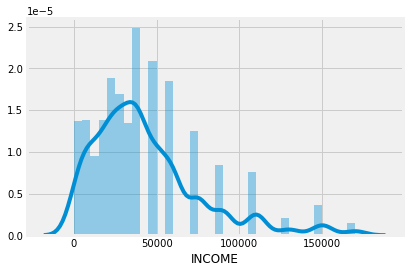

In [343]:
sns.distplot(df["INCOME"])

In [344]:
X = df.drop(columns="INCOME")
y = df["INCOME"]

In [345]:
X

,SIBS,DEGREE_BACHELOR,DEGREE_GRADUATE,DEGREE_HIGH SCHOOL,DEGREE_JUNIOR COLLEGE,PADEG_BACHELOR,PADEG_GRADUATE,PADEG_HIGH SCHOOL,PADEG_JUNIOR COLLEGE,PADEG_LT HIGH SCHOOL,MADEG_BACHELOR,MADEG_GRADUATE,MADEG_HIGH SCHOOL,MADEG_JUNIOR COLLEGE,MADEG_LT HIGH SCHOOL,SEX_FEMALE,SEX_MALE,MAJOR1_ACCOUNTING/BOOKKEEPING,MAJOR1_ADVERTISING,MAJOR1_AGRICULTURE/HORTICULTURE,MAJOR1_ALLIED HEALTH,MAJOR1_ANTHROPOLGY,MAJOR1_ARCHITECTURE,MAJOR1_ART,MAJOR1_Administrative Science/Public Administration,MAJOR1_Aviation/Aeronatics,MAJOR1_BIOLOGY,MAJOR1_BUSINESS ADMINISTRATION,MAJOR1_CHEMISTRY,MAJOR1_COMM. DISORDERS,MAJOR1_COMMUNICATIONS/SPEECH,MAJOR1_COMPUTER SCIENCE,MAJOR1_Child/Human/Family Development,MAJOR1_Counseling,MAJOR1_Criminology/Criminal Justice,MAJOR1_DENTISTRY,MAJOR1_Dance,MAJOR1_ECONOMICS,MAJOR1_EDUCATION,MAJOR1_ENGINEERING,MAJOR1_ENGLISH,MAJOR1_Educational administration,MAJOR1_Electronics,MAJOR1_Environmental Science/Ecology,MAJOR1_Ethnic studies,MAJOR1_FINANCE,MAJOR1_FOREIGN LANGUAGE,MAJOR1_FORESTRY,MAJOR1_Fashion,MAJOR1_Fine Arts,MAJOR1_Food Science/Nutrition/Culinary Arts,MAJOR1_GENERAL SCIENCES,MAJOR1_GENERAL STUDIES,MAJOR1_GEOGRAPHY,MAJOR1_GEOLOGY,MAJOR1_Gerontology,MAJOR1_HEALTH,MAJOR1_HISTORY,MAJOR1_Human Services/Human Resources,MAJOR1_INDUSTRY & TECHN,MAJOR1_Industrial Relations,MAJOR1_Information technology,MAJOR1_JOURNALISM,MAJOR1_LAW,MAJOR1_LAW ENFORCEMENT,MAJOR1_LIBERAL ARTS,MAJOR1_LIBRARY SCIENCE,MAJOR1_MARKETING,MAJOR1_MATHMATICS,MAJOR1_MEDICINE,MAJOR1_MUSIC,MAJOR1_Mechanics/Machine Trade,MAJOR1_NURSING,MAJOR1_OTHER,MAJOR1_OTHER VOCATIONAL,MAJOR1_PHARMACY,MAJOR1_PHILOSOPHY,MAJOR1_PHYSICAL EDUCATION,MAJOR1_PHYSICS,MAJOR1_POLITICAL SCIENCE/INTERNATIONAL RELATIONS,MAJOR1_PSYCHOLOGY,MAJOR1_Parks and Recreation,MAJOR1_Public Relations,MAJOR1_SOCIAL WORK,MAJOR1_SOCIOLOGY,MAJOR1_SPECIAL EDUCATION,MAJOR1_Social Sciences,MAJOR1_Statistics/Biostatistics,MAJOR1_THEATER ARTS,MAJOR1_THEOLOGY,MAJOR1_Television/Film,MAJOR1_Textiles/Cloth,MAJOR1_Urban and Regional Planning,MAJOR1_VETERINARY MEDICINE,MAJOR1_Visual Arts/Graphic Design/Design and Drafting,DIPGED_GED,DIPGED_HS diploma after post HS classes,DIPGED_High School diploma,DIPGED_Other,FAMILY16_FATHER,FAMILY16_FATHER & STPMOTHER,FAMILY16_FEMALE RELATIVE,FAMILY16_M AND F RELATIVES,FAMILY16_MALE RELATIVE,FAMILY16_MOTHER,FAMILY16_MOTHER & FATHER,FAMILY16_MOTHER & STPFATHER,FAMILY16_OTHER,PARBORN_BOTH IN U.S,PARBORN_DK FOR BOTH,PARBORN_FATHER ONLY,PARBORN_MOTHER ONLY,PARBORN_MOTHER; FA. DK,PARBORN_NEITHER IN U.S,PARBORN_NOT FATHER;MO.DK,PARBORN_NOT MOTHER;FA.DK,GRANBORN_1.0,GRANBORN_2.0,GRANBORN_3.0,GRANBORN_4.0,GRANBORN_ALL IN U.S,POLVIEWS_CONSERVATIVE,POLVIEWS_EXTREMELY LIBERAL,POLVIEWS_EXTRMLY CONSERVATIVE,POLVIEWS_LIBERAL,POLVIEWS_MODERATE,POLVIEWS_SLGHTLY CONSERVATIVE,POLVIEWS_SLIGHTLY LIBERAL
0,1.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,6.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,8.0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,7.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [346]:
y

0        8000
1        7000
2       50000
3       25000
4       75000
        ...  
3758    40000
3759    40000
3760    50000
3761    60000
3762     8000
Name: INCOME, Length: 3763, dtype: int64

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear regression

In [348]:
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

-2.7751720305407978e+17

In [349]:
yhat=LR.predict(X_test)

In [350]:
test_mse = mean_squared_error(y_test, yhat)
test_rmse = np.sqrt(test_mse)
test_r2_score = r2_score(y_test, yhat)

In [351]:
test_mse, test_rmse, test_r2_score

(3.152555588459616e+26, 17755437444511.516, -2.7751720305407978e+17)

## Lasso

In [352]:
LAS = linear_model.Lasso(alpha=85, random_state=42).fit(X_train, y_train)
LAS.score(X_test, y_test)

0.15091859140242336

## Ridge Regression

In [353]:
RR = linear_model.Ridge(alpha=85, random_state=42).fit(X_train, y_train)
RR.score(X_test, y_test)

0.15757294603748428

In [354]:
yhat=RR.predict(X_test)
test_r2_score = r2_score(y_test, yhat)
test_r2_score

0.15757294603748428

### Random Forest

In [355]:
RF = RandomForestRegressor(max_depth=6, random_state=42)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.14987449437771827

In [356]:
RF = RandomForestRegressor(max_depth=6, n_estimators=100,min_samples_leaf=2, min_samples_split=5, random_state=42)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.15168819073648487

## XGBoost

In [357]:
# Instantiation 
XG = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bynode = 0.5,colsample_bylevel=0.5, learning_rate = 0.05,
                max_depth = 5, alpha = 10, n_estimators = 100, gamma=0.5)
  
# Fitting the model 
XG.fit(X_train, y_train) 

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=0.5, colsample_bytree=1, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [358]:
XG.score(X_test, y_test)

0.15566510863040006

In [359]:
cross_val_score(XG, X_train, y_train, cv=10).mean()

0.1722187952030311

In [292]:
xgb1 = xgb.XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [0.03, 0.05, 0.1], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [1, 2, 4],
              'subsample': [0.7, 0.9, 1],
               'gamma':[0, 0.1, 0.5],
              'colsample_bylevel': [0.5, 0.7, 1],
              'colsample_bynode': [0.5, 0.7, 1],
              'colsample_bytree': [0.5, 0.7, 1],
              'n_estimators': [100, 200]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 13122 candidates, totalling 26244 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 11226 tasks      

0.1679833778241221
{'colsample_bylevel': 0.5, 'colsample_bynode': 0.5, 'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.9}


In [360]:
xgb_grid.best_params_={'colsample_bylevel': 0.5, 'colsample_bynode': 0.5, 'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.9}

In [361]:
XG = xgb.XGBRegressor(**xgb_grid.best_params_)
XG.fit(X_train, y_train) 
XG.score(X_test, y_test)

0.16381963132089417

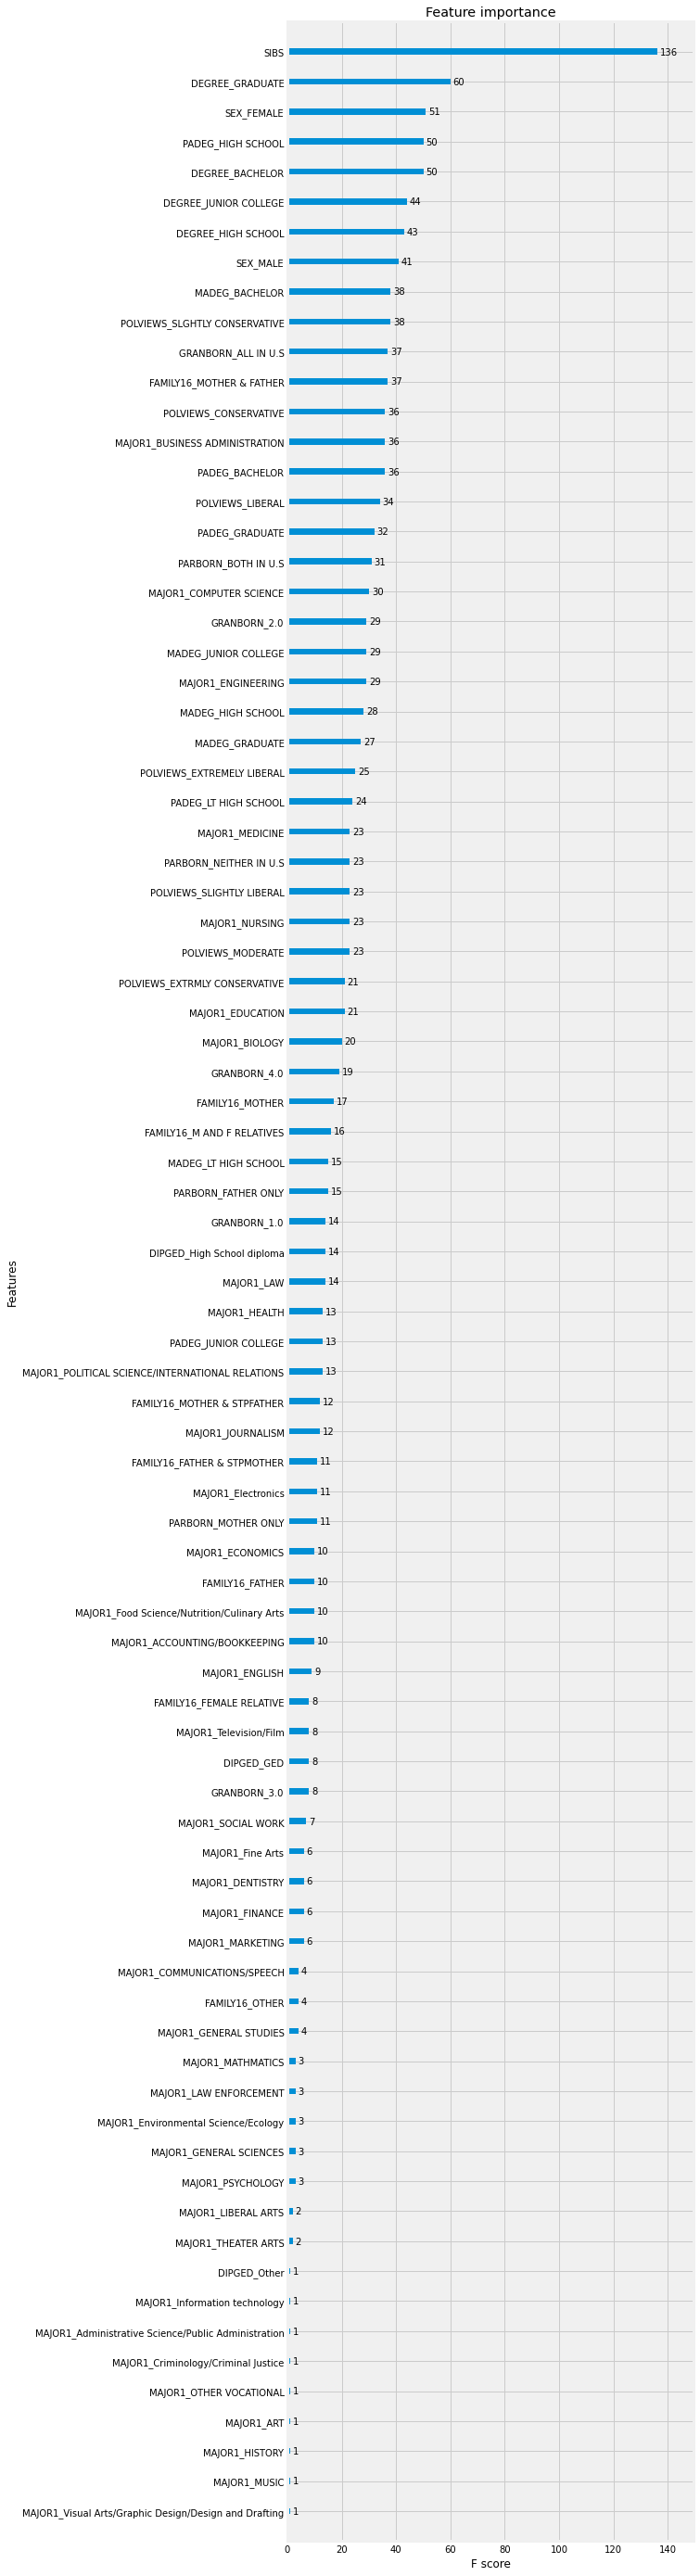

In [363]:
xgb.plot_importance(XG)
plt.rcParams['figure.figsize'] = [7, 50]
plt.show()

In [364]:
with open('model_pickle', 'wb') as f:
    pickle.dump(XG, f)